# Multiple Linear Regression
## Multiple Linear Regression is an extension of Simple Linear Regression, where instead of one independent variable (X), we have multiple independent variables affecting the dependent variable (Y).

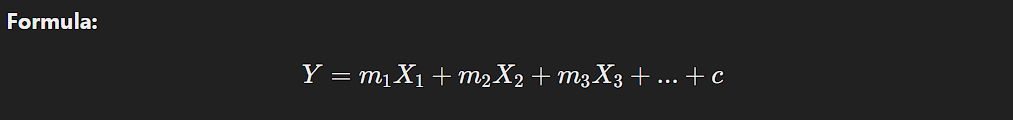


### Y = Dependent Variable (the one we predict)

### X₁, X₂, X₃, ... = Independent Variables (factors affecting Y)

### m₁, m₂, m₃, ... = Coefficients (show how much each X affects Y)

### c = Intercept (the value of Y when all Xs are 0)

## Real-Life Example: Predicting House Price
## Imagine you are a real estate agent and want to predict the price of a house based on multiple factors.

#### Y (Dependent Variable): House Price

#### X₁ (Independent Variable): Size of the House (in sq. ft.)

#### X₂ (Independent Variable): Number of Bedrooms

#### X₃ (Independent Variable): Distance to the Nearest School

#### After analyzing past sales, we create a regression model:

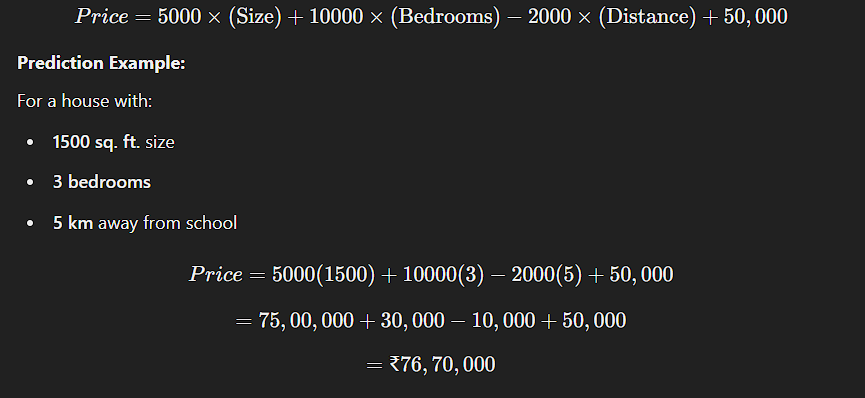



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pickle

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [4]:
X= df.drop(columns='Profit')
y= df['Profit']

In [5]:
X.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [6]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [7]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
X = pd.get_dummies(data=X,columns=['State'],drop_first=True)
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False


### RobustScaler is a tool in Python that helps adjust numbers in a dataset so they are not affected by extreme values (outliers).
### How It Works:
### Instead of using the average (mean) like other methods, it uses:
### The middle value (median)
### The spread of most values (IQR - Interquartile Range, which is the difference between the 75th and 25th percentiles)
### When to Use It?
### ✅ If your data has extreme values (outliers).
###  ✅ When you don’t want those outliers to change the scaling too much.
### ✅ For making data better for machine learning models without losing important patterns.

1️⃣ House Prices Prediction
📌 Problem: House prices in a city can vary a lot. Some houses cost millions, while others are much cheaper. If we use regular scaling, the expensive houses can affect the whole dataset.
✅ Solution: RobustScaler makes sure the model isn't influenced too much by those very high prices.
--------------------------------------------------------------------------------------------------------------------
import numpy as np
from sklearn.preprocessing import RobustScaler

# Example: House prices (in thousands)
prices = np.array([[100], [150], [200], [250], [3000]])  # 3000 is an outlier

scaler = RobustScaler()
scaled_prices = scaler.fit_transform(prices)

print(scaled_prices)
2️⃣ Salary Data
📌 Problem: Suppose you have employee salary data in a company. Most employees earn between 30K-100K, but the CEO earns 5 million. This can make the dataset unbalanced.
✅ Solution: RobustScaler prevents the CEO's huge salary from affecting the model.

---------------------------------------------------------------------------------------------------------------------------
salaries = np.array([[30], [50], [70], [90], [5000]])  # 5000 is an outlier

scaler = RobustScaler()
scaled_salaries = scaler.fit_transform(salaries)

print(scaled_salaries)
3️⃣ Student Exam Scores
📌 Problem: Most students score between 40-90, but one student scores 0 and another scores 100.
✅ Solution: RobustScaler makes sure these extreme scores don’t change the dataset too much.

------------------------------------------------------------------------------------------------------------------------
scores = np.array([[40], [50], [60], [70], [100], [0]])  # 0 and 100 are outliers

scaler = RobustScaler()
scaled_scores = scaler.fit_transform(scores)

print(scaled_scores)


In [ ]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
# X = sc.fit_transform(X)
X[['R&D Spend','Administration','Marketing Spend']] = sc.fit_transform(X[['R&D Spend','Administration','Marketing Spend']] )
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,1.496732,0.345355,1.522416,False,True
1,1.452113,0.697565,1.358546,False,False
2,1.303634,-0.524290,1.147203,True,False
3,1.156567,-0.097977,1.001848,False,True
4,1.119836,-0.761543,0.901764,True,False


# test train split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=102)

Splits the dataset into 80% training and 20% testing data.

random_state=102 ensures reproducibility of results.

In [11]:
X_train

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
31,-0.193212,0.729778,-0.731614,False,True
33,-0.284711,-0.477784,0.011275,True,False
19,0.216789,0.749534,-1.250030,False,True
24,0.064750,-0.569635,-0.423940,False,True
10,0.468034,-0.294461,0.096638,True,False
12,0.337504,0.112392,0.218155,True,False
17,0.350370,0.544322,0.410522,False,True
30,-0.179297,-0.171693,-0.714496,True,False
42,-0.801249,-0.644839,-0.380299,False,False
5,0.953936,-0.556662,0.882330,False,True


In [12]:
y_train

31     97483.56
33     96778.92
19    122776.86
24    108552.04
10    146121.95
12    141585.52
17    125370.37
30     99937.59
42     71498.49
5     156991.12
22    110352.25
6     156122.51
11    144259.40
46     49490.75
36     90708.19
40     78239.91
38     81229.06
48     35673.41
35     96479.51
27    105008.31
28    103282.38
25    107404.34
39     81005.76
16    126992.93
49     14681.40
32     97427.84
3     182901.99
18    124266.90
4     166187.94
7     155752.60
15    129917.04
44     65200.33
45     64926.08
8     152211.77
9     149759.96
43     69758.98
2     191050.39
47     42559.73
14    132602.65
0     192261.83
Name: Profit, dtype: float64

In [13]:
X_test

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
37,-0.469966,-1.737154,-0.092184,False,False
23,-0.089490,-0.412265,0.540948,True,False
26,0.036937,0.521418,-0.462283,True,False
20,0.051937,-0.214843,0.505076,False,False
29,-0.120740,0.737808,-0.620430,False,True
1,1.452113,0.697565,1.358546,False,False
21,0.086569,0.755842,0.511380,False,True
13,0.307158,0.311235,0.234759,False,False
34,-0.431759,0.851204,-0.011275,False,False
41,-0.732297,-0.924053,-0.283515,True,False


In [14]:
y_test

37     89949.14
23    108733.99
26    105733.54
20    118474.03
29    101004.64
1     191792.06
21    111313.02
13    134307.35
34     96712.80
41     77798.83
Name: Profit, dtype: float64

# multiple linear regression

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,y_train)
model

LinearRegression()

# prediction

In [16]:
y_pred = lr.predict(X_test)
y_pred

array([ 87945.70380182, 110085.98872324, 111615.52071114, 114130.41030041,
       102472.90309253, 186101.26707243, 116826.18732432, 125256.95283048,
        86591.67464092,  75650.68475618])

In [17]:
train_acc = lr.predict(X_train)

# evaulton

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9649748132881202

In [19]:
r2_score(y_train,train_acc)

0.9478393895388705

# real data prediction

In [20]:
print(sc.transform([[165349.2,136897.80,471784.10]]))

[[1.49673201 0.34535525 1.52241555]]


C:\Users\Sandeep\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [ ]:
lr.predict([[1.49673201,0.34535525,1.52241555,0,1]])

C:\Users\Sandeep\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([191669.00469578])

In [22]:
# save model
pickle.dump(lr,open("Ml model",mode='wb'))